<a href="https://colab.research.google.com/github/Saonoke/PVCK_Ganjil_2024/blob/main/week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

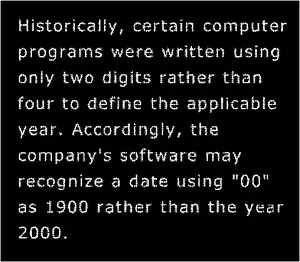

In [3]:
image = cv.imread('/content/drive/MyDrive/morphology.png')
cv2_imshow(image)

In [47]:
def dilation(image, struct_element):
    # Mendefinisikan ukuran gambar baru yang sama dengan ukuran gambar input
    new_image = np.zeros_like(image)

    # Mendapatkan ukuran structuring element
    element_size = struct_element.shape[0] // 2

    # Looping melalui setiap pixel di gambar
    for x in range(element_size, image.shape[0] - element_size):
        for y in range(element_size, image.shape[1] - element_size):
            # Membuat jendela kecil di sekitar pixel (x, y)
            window = image[x - element_size:x + element_size + 1, y - element_size:y + element_size + 1]

            # Melakukan dilasi dengan mengambil maksimum antara window dan structuring element
            new_image[x, y] = np.max(window * struct_element)

    return new_image


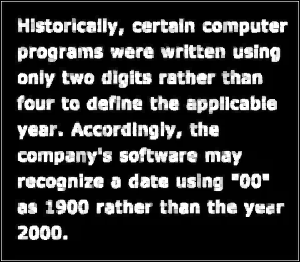

In [5]:
struct_element = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]])  # Structuring element (SED)

dilated_image = dilation(image, struct_element)
cv2_imshow(dilated_image)

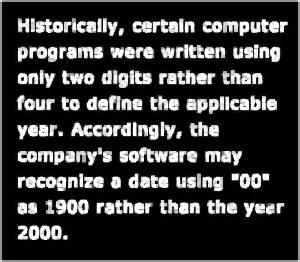

In [7]:
# Membuat structuring element (kernel) berbentuk persegi 3x3
kernel = np.ones((3, 3), np.uint8)
dilation_image = cv.dilate(image, kernel)
cv2_imshow(dilation_image)


In [38]:
# Fungsi untuk erosi manual
def manual_erode(image, kernel):
    # Ukuran gambar
    img_h, img_w = image.shape

    # Ukuran kernel
    k_h, k_w = kernel.shape

    # Padding gambar agar kernel bisa digeser pada pinggiran gambar
    pad_h = k_h // 2
    pad_w = k_w // 2

    # Membuat gambar hasil dengan ukuran yang sama, diisi dengan 0 (hitam)
    eroded_image = np.zeros((img_h, img_w), dtype=np.uint8)

    # Menambahkan padding ke gambar (untuk penanganan tepi)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Melakukan erosi manual
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Area gambar yang akan diperiksa oleh kernel
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Jika seluruh area sesuai dengan kernel (nilai 1), maka piksel pusat tetap 1, jika tidak, menjadi 0
            if np.array_equal(region, kernel):
                eroded_image[i - pad_h, j - pad_w] = 255
            else:
                eroded_image[i - pad_h, j - pad_w] = 0

    return eroded_image

(150, 112)


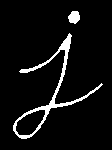

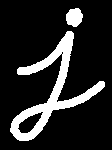

In [40]:
image_j = cv.imread('/content/drive/MyDrive/j.png')
image_j = cv.cvtColor(image_j, cv.COLOR_BGR2GRAY)

# Mengubah gambar menjadi biner (thresholding)
_, binary_image = cv.threshold(image_j, 127, 255, cv.THRESH_BINARY)

print(binary_image.shape)

# Membuat structuring element (kernel) 3x3
kernel = np.ones((5, 5), np.uint8) * 255  # Kernel berisi semua 1s (255 untuk gambar biner)

# Menerapkan erosi manual
eroded_image = manual_erode(binary_image, kernel)

cv2_imshow(eroded_image)
cv2_imshow(image_j)


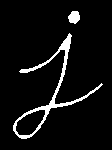

In [41]:
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv.erode(image_j, kernel)
cv2_imshow(eroded_image)


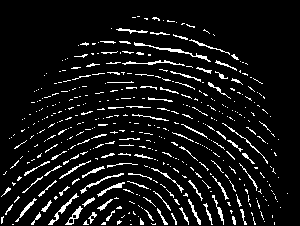

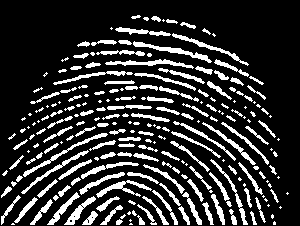

In [52]:
image_finger = cv.imread('/content/drive/MyDrive/fingerprint.png')
image_finger = cv.cvtColor(image_finger, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(image_finger, 127, 255, cv.THRESH_BINARY)

# Membuat structuring element (kernel) 3x3
kernel = np.ones((3, 3), np.uint8) * 255  # Kernel berisi semua 1s (255 untuk gambar biner)

# Menerapkan erosi manual
eroded_image = manual_erode(binary_image, kernel)
opening_image = dilation(eroded_image, struct_element)


cv2_imshow(eroded_image)
cv2_imshow(opening_image)


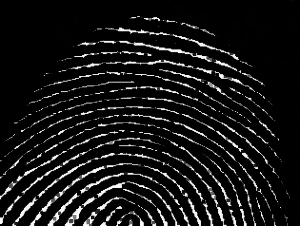

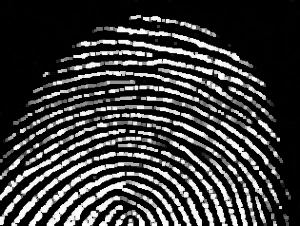

In [53]:
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv.erode(image_finger, kernel)
cv2_imshow(eroded_image)
opening_image = cv.dilate(eroded_image, kernel)
cv2_imshow(opening_image)


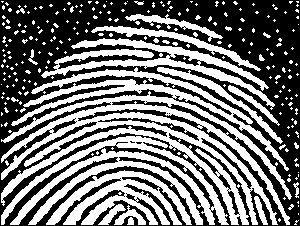

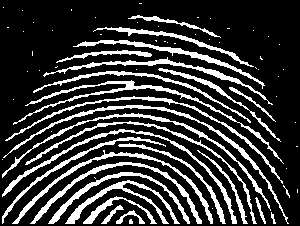

In [54]:
image_finger = cv.imread('/content/drive/MyDrive/fingerprint.png')
image_finger = cv.cvtColor(image_finger, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(image_finger, 127, 255, cv.THRESH_BINARY)

# Membuat structuring element (kernel) 3x3
kernel = np.ones((3, 3), np.uint8) * 255  # Kernel berisi semua 1s (255 untuk gambar biner)

# Menerapkan erosi manual
dilated_image = dilation(binary_image, struct_element)
closing_image = manual_erode(dilated_image,kernel)

cv2_imshow(dilated_image)
cv2_imshow(closing_image)


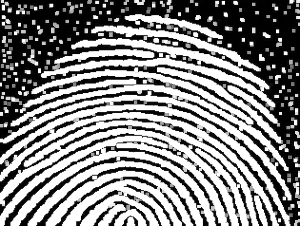

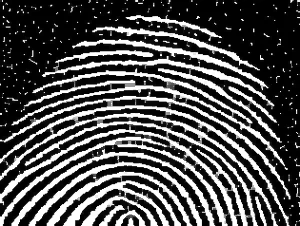

In [55]:
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv.dilate(image_finger, kernel)
cv2_imshow(eroded_image)
opening_image = cv.erode(eroded_image, kernel)
cv2_imshow(opening_image)

SED = Cross 3


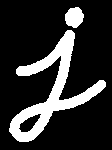

SED = Cross 5


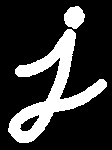

In [57]:
print('SED = Cross 3')
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
dilated_image = cv.dilate(image_j, kernel)
cv2_imshow(dilated_image)

print('SED = Cross 5')
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
dilated_image = cv.dilate(image_j, kernel)
cv2_imshow(dilated_image)

SED = Circular 3


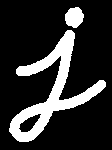

SED = circular 5


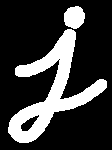

In [58]:
print('SED = Circular 3')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
dilated_image = cv.dilate(image_j, kernel)
cv2_imshow(dilated_image)

print('SED = circular 5')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
dilated_image = cv.dilate(image_j, kernel)
cv2_imshow(dilated_image)

SED = Rectangle 3


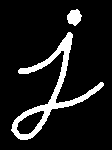

SED = Rectangle 5


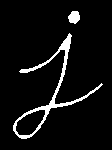

In [60]:
print('SED = Rectangle 3')
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
dilated_image = cv.erode(image_j, kernel)
cv2_imshow(dilated_image)

print('SED = Rectangle 5')
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
dilated_image = cv.erode(image_j, kernel)
cv2_imshow(dilated_image)

SED = Line Vertical 3


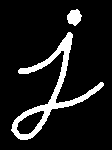

SED = Line Vertical 5


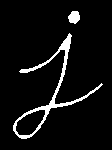

In [62]:
print('SED = Line Vertical 3')
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
dilated_image = cv.erode(image_j, kernel)
cv2_imshow(dilated_image)

print('SED = Line Vertical 5')
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
dilated_image = cv.erode(image_j, kernel)
cv2_imshow(dilated_image)